In [1]:
import requests
import pandas as pd

In [2]:
url = "https://datasets-server.huggingface.co/splits?dataset=cnn_dailymail"

response = requests.get(url)
data = response.json()

data

{'splits': [{'dataset': 'cnn_dailymail', 'config': '1.0.0', 'split': 'train'},
  {'dataset': 'cnn_dailymail', 'config': '1.0.0', 'split': 'validation'},
  {'dataset': 'cnn_dailymail', 'config': '1.0.0', 'split': 'test'},
  {'dataset': 'cnn_dailymail', 'config': '2.0.0', 'split': 'train'},
  {'dataset': 'cnn_dailymail', 'config': '2.0.0', 'split': 'validation'},
  {'dataset': 'cnn_dailymail', 'config': '2.0.0', 'split': 'test'},
  {'dataset': 'cnn_dailymail', 'config': '3.0.0', 'split': 'train'},
  {'dataset': 'cnn_dailymail', 'config': '3.0.0', 'split': 'validation'},
  {'dataset': 'cnn_dailymail', 'config': '3.0.0', 'split': 'test'}],
 'pending': [],
 'failed': []}

In [3]:
url = "https://datasets-server.huggingface.co/rows?dataset=cnn_dailymail&config=3.0.0&split=train&offset=0&limit=100"

response = requests.get(url)
data = response.json()

data['features']

[{'feature_idx': 0,
  'name': 'article',
  'type': {'dtype': 'string', '_type': 'Value'}},
 {'feature_idx': 1,
  'name': 'highlights',
  'type': {'dtype': 'string', '_type': 'Value'}},
 {'feature_idx': 2,
  'name': 'id',
  'type': {'dtype': 'string', '_type': 'Value'}}]

In [4]:
url = "https://datasets-server.huggingface.co/rows?dataset=cnn_dailymail&config=3.0.0&split=train"
response = requests.get(url)
data = response.json()

# Convert JSON to DataFrame
df = pd.DataFrame(data['rows'])
df = df['row'].apply(pd.Series)

# Display the DataFrame
df

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
...,...,...,...
95,"DENVER, Colorado -- A Colorado man terrorized ...",Some witnesses say Colorado does nothing to pr...,f70a7abb6c5b0ef383ea12a4d9ca046a5bd854e5
96,"LONDON, England (CNN) -- Previously unseen foo...",NEW: Jury shown new footage of Diana taken hou...,a3dd38ec7bc9d7e8423b96d8fd0641a2a5d5c984
97,WASHINGTON (CNN) -- Republicans reacted with s...,"Republican Sen. Lindsey Graham: ""I am astounde...",654c6b29b96d2a5a818d91400c20f838b0e8b6df
98,"ST. PETERSBURG, Florida (CNN) -- The acrimony ...","YouTube questions address taxes, the Bible, ab...",764d9ce99a1e3f79d95fbc4b68adbce14e7f8bcd


In [5]:
from datasets import load_dataset

dataset = load_dataset('cnn_dailymail', '3.0.0')

Found cached dataset cnn_dailymail (C:/Users/vijay/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [7]:
train_data = dataset['train']
print(train_data)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})


In [8]:
train_df = pd.DataFrame(train_data)

train_df.head(10)

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
5,"BAGHDAD, Iraq (CNN) -- Dressed in a Superman s...","Parents beam with pride, can't stop from smili...",a1ebb8bb4d370a1fdf28769206d572be60642d70
6,"BAGHDAD, Iraq (CNN) -- The women are too afrai...","Aid workers: Violence, increased cost of livin...",7c0e61ac829a3b3b653e2e3e7536cc4881d1f264
7,"BOGOTA, Colombia (CNN) -- A key rebel commande...",Tomas Medina Caracas was a fugitive from a U.S...,f0d73bdab711763e745cdc75850861c9018f235d
8,WASHINGTON (CNN) -- White House press secretar...,"President Bush says Tony Snow ""will battle can...",5e22bbfc7232418b8d2dd646b952e404df5bd048
9,(CNN) -- Police and FBI agents are investigati...,Empty anti-tank weapon turns up in front of Ne...,613d6311ec2c1985bd44707d1796d275452fe156


In [9]:
test_data = dataset['test']
print(test_data)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})


In [10]:
test_df = pd.DataFrame(test_data)

test_df.head(10)

,article,highlights,id
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f
5,(CNN)He's a blue chip college basketball recru...,College-bound basketball star asks girl with D...,1b2cc634e2bfc6f2595260e7ed9b42f77ecbb0ce
6,(CNN)Governments around the world are using th...,Amnesty's annual death penalty report catalogs...,e2706dce6cf26bc61b082438188fdb6e130d9e40
7,"(CNN)Andrew Getty, one of the heirs to billion...",Andrew Getty's death appears to be from natura...,0d3c8c276d079c4c225f034c69aa024cdab7869d
8,(CNN)Filipinos are being warned to be on guard...,"Once a super typhoon, Maysak is now a tropical...",6222f33c2c79b80be437335eeb3f488509e92cf5
9,"(CNN)For the first time in eight years, a TV l...","Bob Barker returned to host ""The Price Is Righ...",2bd8ada1de6a7b02f59430cc82045eb8d29cf033


In [11]:
validation_data = dataset['validation']
print(validation_data)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 13368
})


In [12]:
validation_df = pd.DataFrame(validation_data)

validation_df.head(10)

,article,highlights,id
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...,a4942dd663020ca54575471657a0af38d82897d6
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...,4157bc4da185971e2742f349d69a037343bc0d95
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...,60736693e3b1b32d14337a317190c6606e879a85
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...,8cdf9cc3ed0276b7a7944cc18ba459355b5984ad
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ...",2e6613d531843515bf5401286cc3e45c4df530d2
5,(CNN)My vote for Father of the Year goes to Cu...,Ruben Navarrette: Schilling deserves praise fo...,fbc5ac3a3a7bb6c4d628cfbeef92b67bb18562f9
6,"(CNN)Another one for the ""tourists behaving ba...",Two American women arrested for carving initia...,d093aa07380f75e63265793fcaa171772a6f4616
7,(CNN)Following last year's successful U.K. tou...,It will be a first time for the tour stateside...,0485e4f199828cd03857391cbe573142193ca953
8,(CNN)A shooting at a bar popular with expatria...,A jihadist group claims responsibility in an a...,c6df0bbd0b5eaa67e1f2b70892bf0a5dfb761895
9,(CNN)Manchester United defender Jonny Evans an...,Alleged incident happened in match at St James...,4a323dd3a1be975d93e941361082937cd2aafc88


In [13]:
train_df.count()

article       287113
highlights    287113
id            287113
dtype: int64

In [14]:
test_df.count()

article       11490
highlights    11490
id            11490
dtype: int64

In [15]:
validation_df.count()

article       13368
highlights    13368
id            13368
dtype: int64

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
 2   id          287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [17]:
output_file = "train_article_parquet"
train_df[['article']].to_parquet(output_file, index=False)

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, split, count, concat_ws

spark = SparkSession.builder.config("spark.driver.memory", "8g") \
    .config("spark.driver.memoryOverhead", "4g") \
    .config("spark.executor.memory", "8g") \
    .config("spark.executor.memoryOverhead", "4g") \
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()

In [19]:
spark.catalog.clearCache()
spark_df = spark.read.parquet('train_article_parquet', header=True, inferSchema=True)

all_sentences = spark_df.select(spark_df['article'].alias('sentences')).repartition(100)

words = all_sentences.select(explode(split(col('sentences'), ' ')).alias('word'))

word_frequencies = words.groupBy('word').agg(count('*').alias('frequency'))

sorted_words = word_frequencies.orderBy(col('frequency').desc())

most_common_words = sorted_words.limit(100)

most_common_words.show(100)

+-------+---------+
|   word|frequency|
+-------+---------+
|    the|  9782342|
|     to|  5328020|
|     of|  4550345|
|      a|  4483367|
|    and|  4476906|
|     in|  3822057|
|      .|  3068629|
|    was|  1882784|
|    for|  1778443|
|   that|  1715127|
|     on|  1624206|
|     is|  1613849|
|   with|  1354300|
|    The|  1336222|
|    his|  1151175|
|     he|  1114620|
|     at|  1100273|
|     as|  1083315|
|   have|   935022|
|   from|   918615|
|    has|   870655|
|     by|   869376|
|     be|   860152|
|     it|   858935|
|    her|   787865|
|    are|   781332|
|   said|   736503|
|     an|   677030|
|    who|   671140|
|    had|   669907|
|      I|   651132|
|    not|   633355|
|   been|   600322|
|   were|   599138|
|  their|   595419|
|   they|   579735|
|    she|   571879|
|    but|   562646|
|  after|   543611|
|   this|   521319|
|   will|   512953|
|  which|   443562|
|   when|   395613|
|  about|   388551|
|     or|   374006|
|    one|   364148|
|   more|   363056|


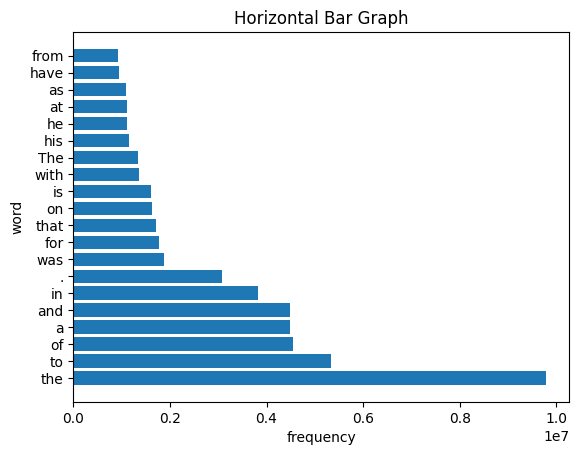

In [20]:
import matplotlib.pyplot as plt
common_words = most_common_words.toPandas().sort_values(by='frequency', ascending=False).head(20)

plt.barh(common_words['word'], common_words['frequency'])

plt.xlabel('frequency')
plt.ylabel('word')
plt.title('Horizontal Bar Graph')

plt.show()

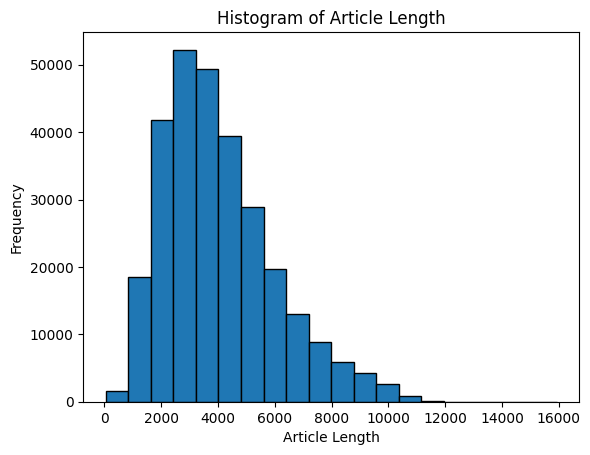

In [21]:
train_df['article_length'] = train_df['article'].str.len()

plt.hist(train_df['article_length'], bins=20, edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Histogram of Article Length')
plt.show()

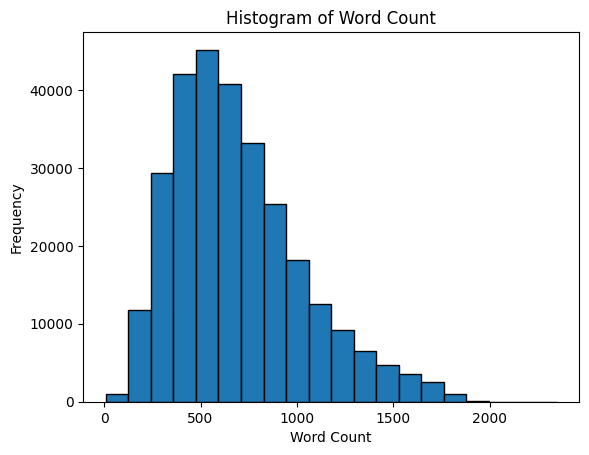

In [22]:
train_df['word_count'] = train_df['article'].apply(lambda x: len(str(x).split()))

# Plot histogram
plt.hist(train_df['word_count'], bins=20, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
plt.show()

In [23]:
from pyspark.sql.functions import length

spark.catalog.clearCache()
spark_df = spark.read.parquet('train_article_parquet', header=True, inferSchema=True)

In [24]:
word_df = spark_df.select(explode(split(spark_df['article'], ' ')).alias('word'))

In [25]:
length_df = word_df.select(length('word').alias('word_length'))

In [26]:
word_length_count = length_df.groupBy('word_length').count()

In [27]:
pandas_df = word_length_count.toPandas()

Minimum: 0.0
Maximum: 320.0
Median: 113.0


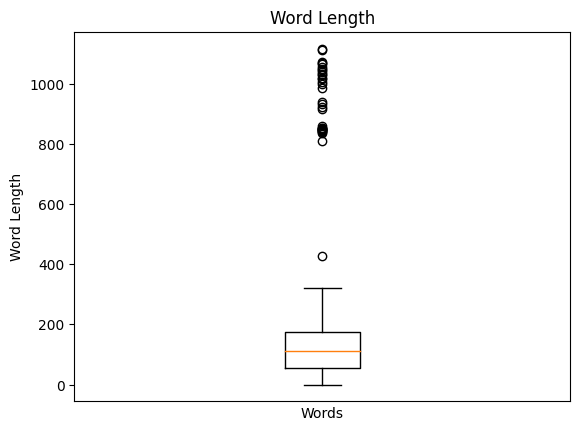

In [28]:
import numpy as np

boxplot = plt.boxplot(pandas_df['word_length'])

# Extract the statistics
stats = {
    'min': np.min(boxplot['whiskers'][0].get_ydata()),
    'max': np.max(boxplot['whiskers'][1].get_ydata()),
    'median': np.median(boxplot['medians'][0].get_ydata())
}

# Display the statistics
print(f"Minimum: {stats['min']}")
print(f"Maximum: {stats['max']}")
print(f"Median: {stats['median']}")

plt.xticks([])

plt.xlabel('Words')
plt.ylabel('Word Length')
plt.title('Word Length')
plt.show()

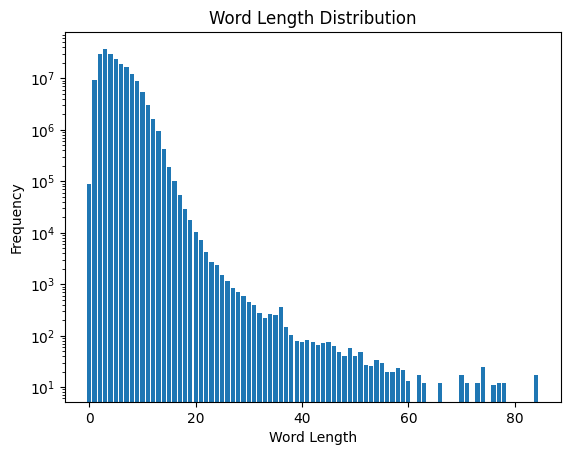

In [29]:
filtered_df = pandas_df[pandas_df['count'] > 10]

import matplotlib.pyplot as plt
plt.bar(filtered_df['word_length'] , filtered_df['count'])
plt.yscale('log')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()

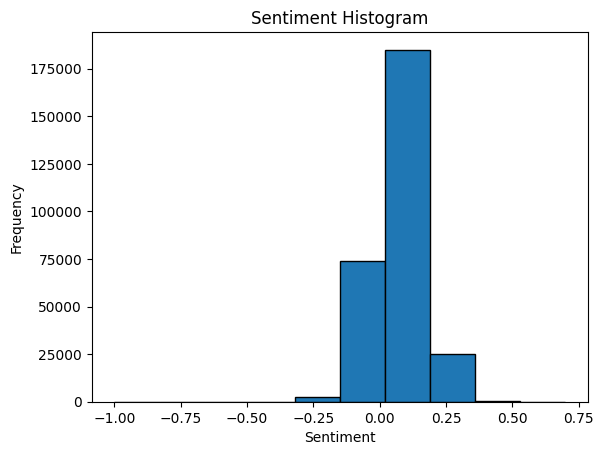

In [30]:
from textblob import TextBlob

train_df['sentiment'] = train_df['article'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot histogram of sentiment values
plt.hist(train_df['sentiment'], bins=10, edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Histogram')
plt.show()

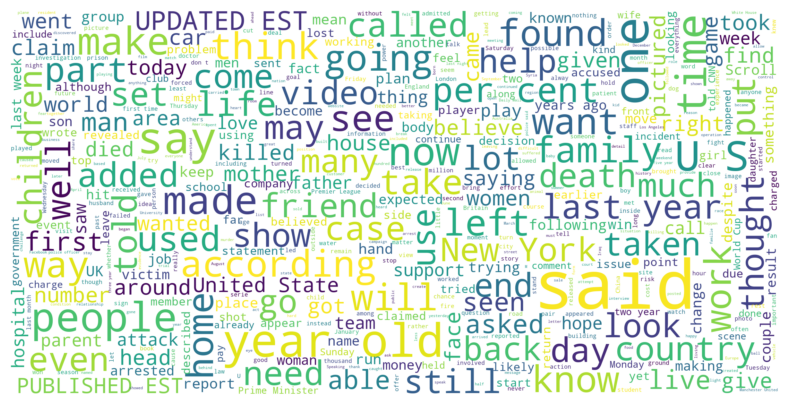

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                        background_color='white',
                        max_words=500,
                        max_font_size=70,
                        scale=3).generate(' '.join(train_df['article']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()